# 📊 Data Analysis Practice - E-Commerce Sales Dataset
This notebook helps you practice **NumPy**, **Pandas**, **Matplotlib**, and **Seaborn** using a real-world style dataset (`sales_data.csv`).

## 🧩 Step 1: Import Libraries & Load Data

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("sales_data.csv")
df.head()


,order_id,order_date,customer_id,region,category,quantity,unit_price,discount,payment_method,rating
0,1001,2024-01-01,C039,North,Electronics,2,993,0.28,UPI,1
1,1002,2024-01-02,C052,North,Beauty,2,2034,0.05,UPI,1
2,1003,2024-01-03,C029,West,Grocery,3,2316,0.17,Credit Card,1
3,1004,2024-01-04,C015,East,Electronics,1,1883,0.27,COD,1
4,1005,2024-01-05,C043,South,Clothing,5,210,0.01,Debit Card,5


## 🧠 Step 2: NumPy + Basic Pandas
1️⃣ Calculate mean, median, and standard deviation of `unit_price`.
2️⃣ Create a new column `revenue = quantity * unit_price * (1 - discount)`
3️⃣ Find number of unique customers.

In [36]:
#1️⃣ Calculate mean, median, and standard deviation of unit_price.
Mean = df['unit_price'].mean()
Median = df['unit_price'].median()
SD = df['unit_price'].std()
print(f' Mean in {Mean}, Median is {Median}, Standard Deviation {SD}')


 Mean in 1536.03, Median is 1509.5, Standard Deviation 822.3394898429623


In [97]:
#2️⃣ Create a new column revenue = quantity * unit_price * (1 - discount)
df['revenue'] = df['quantity'] * df['unit_price'] * (1-df['discount'])
df


,order_id,order_date,customer_id,region,category,quantity,unit_price,discount,payment_method,rating,revenue
0,1001,2024-01-01,C039,North,Electronics,2,993,0.28,UPI,1,1429.92
1,1002,2024-01-02,C052,North,Beauty,2,2034,0.05,UPI,1,3864.60
2,1003,2024-01-03,C029,West,Grocery,3,2316,0.17,Credit Card,1,5766.84
3,1004,2024-01-04,C015,East,Electronics,1,1883,0.27,COD,1,1374.59
4,1005,2024-01-05,C043,South,Clothing,5,210,0.01,Debit Card,5,1039.50
...,...,...,...,...,...,...,...,...,...,...,...
295,1296,2024-10-22,C006,South,Furniture,2,688,0.02,Debit Card,2,1348.48
296,1297,2024-10-23,C022,North,Grocery,3,1761,0.27,COD,5,3856.59
297,1298,2024-10-24,C011,South,Grocery,3,246,0.16,Debit Card,2,619.92
298,1299,2024-10-25,C048,East,Grocery,3,977,0.25,Debit Card,4,2198.25


In [38]:
#3️⃣ Find number of unique customers.
df['customer_id'].nunique()

59

## 🐼 Step 3: Intermediate Pandas
4️⃣ Region with highest total revenue.
5️⃣ Average rating per category.
6️⃣ Top 5 customers by spending.
7️⃣ Average order value by payment method.
8️⃣ Monthly sales trend.

In [51]:
#4️⃣ Region with highest total revenue. 

regionsale= df.groupby('region')['revenue'].sum().sort_values(ascending = False).head(1)
print(f'Region with highest total revenue {regionsale}')


Region with highest total revenue region
West    305066.69
Name: revenue, dtype: float64


In [90]:
#5️⃣ Average rating per category.

df['rating'] = df['rating'].astype(int)

df.groupby('category')['rating'].mean()

category
Beauty         2.637931
Clothing       3.036364
Electronics    3.095238
Furniture      2.978261
Grocery        3.153846
Name: rating, dtype: float64

In [96]:
#7️⃣ Average order value by payment method.

df.groupby('payment_method')['revenue'].mean().round(2).sort_values(ascending = False)

payment_method
UPI            4170.07
COD            3801.29
Debit Card     3728.03
Credit Card    3426.89
Name: revenue, dtype: float64

In [171]:
#8️⃣ Monthly sales trend.
df['order_date'] = pd.to_datetime(df['order_date'])
df['Month'] = df['order_date'].dt.to_period('M')  

Monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()
Monthly_revenue

Monthly_revenue['Month'] = Monthly_revenue['Month'].astype(str)
Monthly_revenue


,Month,revenue
0,2024-01,105705.78
1,2024-02,106072.96
2,2024-03,117644.16
3,2024-04,112327.31
4,2024-05,100125.46
5,2024-06,112553.44
6,2024-07,134556.52
7,2024-08,123601.51
8,2024-09,98628.56
9,2024-10,120817.49


## 📈 Step 4: Matplotlib Visualizations
- Line plot: monthly revenue trend
- Bar chart: total revenue by region
- Pie chart: orders by payment method
- Histogram: rating distribution

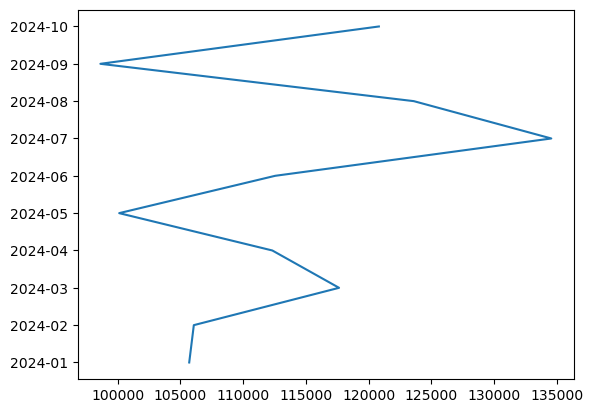

In [306]:
#1- Line plot: monthly revenue trend
plt.plot(Monthly_revenue.revenue, Monthly_revenue.Month )


<BarContainer object of 300 artists>

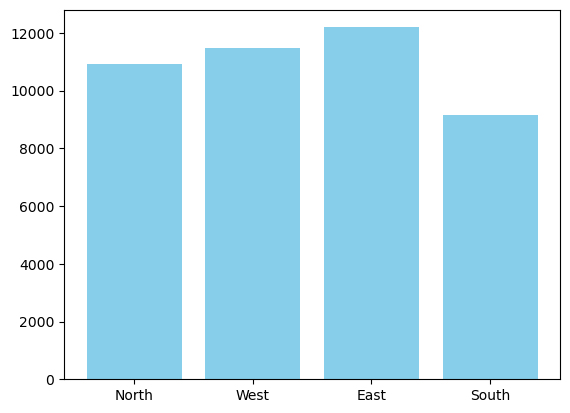

In [332]:
#2- Bar chart: total revenue by region
plt.bar(df.region, df.revenue, color = 'skyblue')


In [240]:
#3 - Pie chart: orders by payment method
revenue_type = df.groupby('payment_method')['revenue'].sum().reset_index()
revenue_type

,payment_method,revenue
0,COD,288897.85
1,Credit Card,260443.63
2,Debit Card,290786.70
3,UPI,291905.01


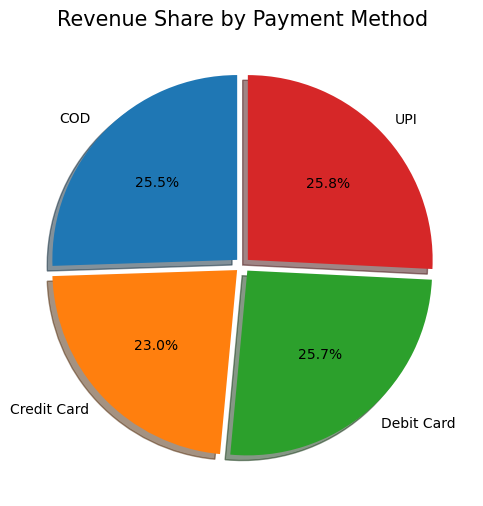

<Figure size 640x480 with 0 Axes>

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    revenue_type['revenue'], labels=revenue_type['payment_method'], autopct='%1.1f%%', startangle=90,
    explode=[0.04]*len(revenue_type),  # separate slices slightly
    shadow=True
)

plt.title("Revenue Share by Payment Method", fontsize=15)
plt.show()
plt.savefig('Revenuebypayment.png')

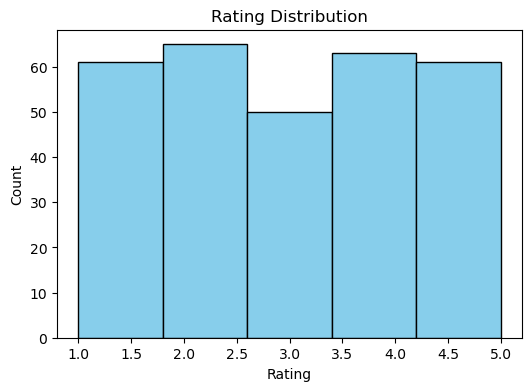

In [341]:
#4 - Histogram: rating distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['rating'], bins=5, color=('skyblue'), edgecolor='black')  # Matplotlib does not support kde
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## 🌈 Step 5: Seaborn Visualizations
- Boxplot: revenue by category
- Heatmap: correlation of numerical features

Text(0, 0.5, 'Revenue')

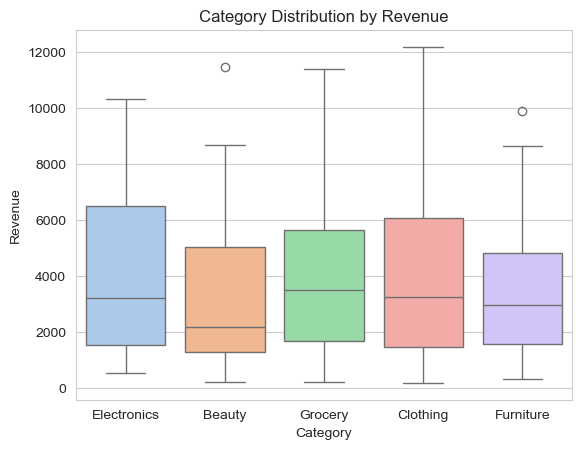

In [362]:
sns.boxplot(df, x = 'category', y= 'revenue', hue = 'category', palette='pastel' )
plt.title('Category Distribution by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')

Text(0.5, 1.0, 'Correlation of Numerical Features')

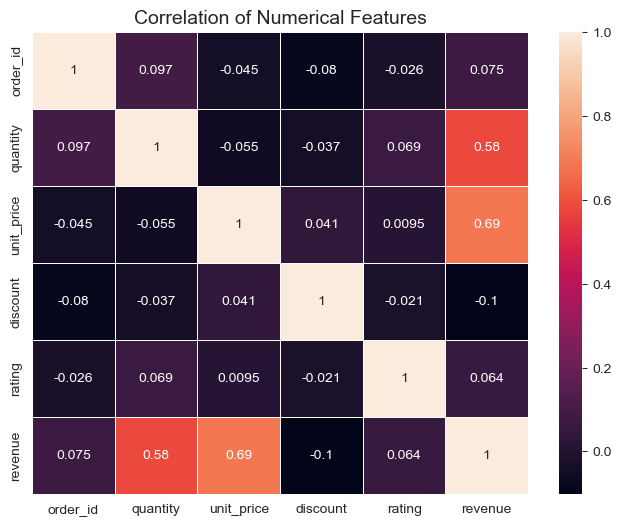

In [385]:
# Heat map
plt.figure(figsize = (8,6))
corr = df.corr(numeric_only= True)
sns.heatmap( corr, annot = True, linewidths=0.5)
plt.title("Correlation of Numerical Features", fontsize=14)


## 

## ⚡ Bonus Challenge
- Find the most profitable region & category combination.
- Visualize with a heatmap.
- Write 3 key insights.

In [387]:
df.head()

,order_id,order_date,customer_id,region,category,quantity,unit_price,discount,payment_method,rating,revenue,Month
0,1001,2024-01-01,C039,North,Electronics,2,993,0.28,UPI,1,1429.92,2024-01
1,1002,2024-01-02,C052,North,Beauty,2,2034,0.05,UPI,1,3864.60,2024-01
2,1003,2024-01-03,C029,West,Grocery,3,2316,0.17,Credit Card,1,5766.84,2024-01
3,1004,2024-01-04,C015,East,Electronics,1,1883,0.27,COD,1,1374.59,2024-01
4,1005,2024-01-05,C043,South,Clothing,5,210,0.01,Debit Card,5,1039.50,2024-01


In [397]:
region_category  = df.groupby(['region', 'category'])['revenue'].sum().reset_index() 

# Pivot for heatmap
pivot_table = region_category.pivot(index='region', columns='category', values='revenue')
pivot_table


category,Beauty,Clothing,Electronics,Furniture,Grocery
region,,,,,
East,50911.16,54886.62,63147.71,44889.62,74348.71
North,32484.66,51021.42,72883.46,49030.82,93022.03
South,47648.82,53181.43,41914.80,29903.71,67691.53
West,54946.83,51549.88,86509.87,41298.18,70761.93


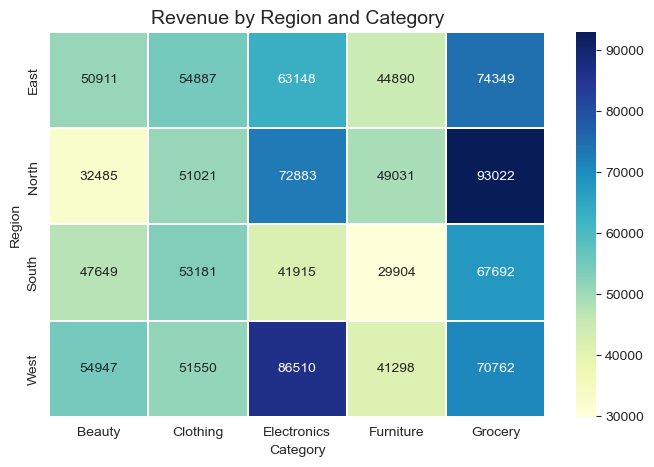

''

In [406]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths= 0.3)

plt.title('Revenue by Region and Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Region')
plt.show() 
;

In [408]:
max_value = pivot_table.max().max()
max_region = pivot_table.stack().idxmax()[0]
max_category = pivot_table.stack().idxmax()[1]

print(f"Most profitable combination: {max_region} - {max_category} (Revenue: {max_value:,.2f})")

Most profitable combination: North - Grocery (Revenue: 93,022.03)


In [ ]:
# #3 Key Insights: Revenue by Region & Category

# Most Profitable Combination:
# The West–Grocery combination generates the highest total revenue, indicating that grocery items are in strong demand in the western region.

# Category Performance:
# Electronics and Clothing show consistent revenue across most regions, suggesting they are well-performing and stable product categories overall.
# Improvement Opportunity:
# Furniture and Beauty categories contribute the least revenue in almost all regions — these areas may require better marketing, discounts, or targeted regional campaigns.